In [ ]:
import csv
from scipy import sparse
import networkx as nx 
import numpy as np
from networkx.algorithms import number_connected_components

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# construct mobile-email matrix by reading sample_data.csv

In [4]:
# indexers
# assign unique index to mobile
def get_mobile_idx(mobile):
    return mobile_indexer.setdefault(mobile, len(mobile_indexer))

def get_email_idx(email):
    return email_indexer.setdefault(email, len(email_indexer))

In [22]:
mobile_indexer = {}
email_indexer = {}
rows = [] # mobile
cols = [] # email
data = [] # True if there is a relation between mobile-email
with open("C:/Nitin_MMT/MMT_study/Other projects/madhu-gcid/sampledata.csv") as infile:
    reader = csv.reader(infile)
    for row in reader:
        rows.append(get_mobile_idx(row[3]))
        cols.append(get_email_idx(row[4]))
        data.append(True)
mobile_email_mat = sparse.csr_matrix((data, (rows, cols)), dtype=np.bool)

# construct mobile-mobile graph from mobile_email_mat

In [50]:
# do email_index to email lookup
email_rev_indexer = { v : k for k,v in email_indexer.items() }
mobile_rev_indexer = { v : k for k,v in mobile_indexer.items() }
# for email -> mobile lookup
mobile_email_mat_csc = mobile_email_mat.tocsc()

In [51]:
G = nx.Graph()
# iterate over mobiles, get associated emails
# for each email, get the associated mobiles
# then create 2 mobile nodes and set the email as the edge attribute
for mobile, midx in mobile_indexer.items():
    G.add_node(mobile)
    for eidx in mobile_email_mat[midx,:].indices:
        email = email_rev_indexer[eidx]
        for omidx in mobile_email_mat_csc[:,eidx].indices:
            omobile = mobile_rev_indexer[omidx]
            G.add_edge(mobile, omobile, email=email)

# mobile_email_mat.toarray()

In [55]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 20
Average degree:   2.0000


In [63]:
number_connected_components(G)

20

In [57]:
G['9310620011']

{'9310620011': {'email': 'arvind.mittal24@gmail.com'}}

In [20]:
G['7838075246']

{'7838075246': {'email': 'oldmonk234@outlook.com'},
 '8376961677': {'email': 'sd.dxt@rediffmail.com'},
 '8377047622': {'email': '9871414147b@gmail.com'},
 '8860010792': {'email': '9871800701z@gmail.com'},
 '9268820700': {'email': 'punetarora55012@gmail.com'},
 '9268820708': {'email': '9871800701y@gmail.com'},
 '9560250556': {'email': '9871414147b@gmail.com'},
 '9650411041': {'email': '9871800701y@gmail.com'},
 '9654420700': {'email': 'puneetarora948@gmail.com'},
 '9810426967': {'email': 'srinagar889@gmail.com'},
 '9811777998': {'email': 'srinagar889@gmail.com'},
 '9871414147': {'email': 'oldmonk234@outlook.com'},
 '9871800701': {'email': 'oldmonk234@outlook.com'},
 '9878040231': {'email': 'punetarora55012@gmail.com'},
 '9910909191': {'email': '9871800701y@gmail.com'},
 '9953133342': {'email': 'rbajaj767@rediffmail.com'}}

In [59]:
def get_subgraph(mobile):
    #subgraph with a mobile and its neighbours
    adj = G[mobile]
    return nx.subgraph(G, set([mobile]).union(adj.keys()))

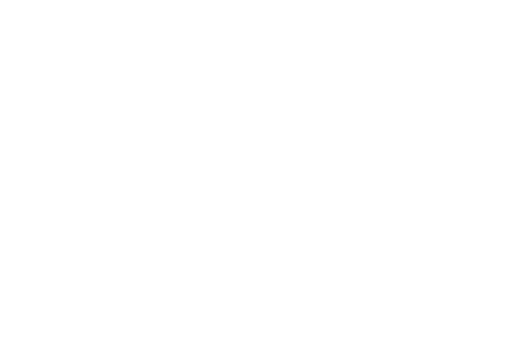

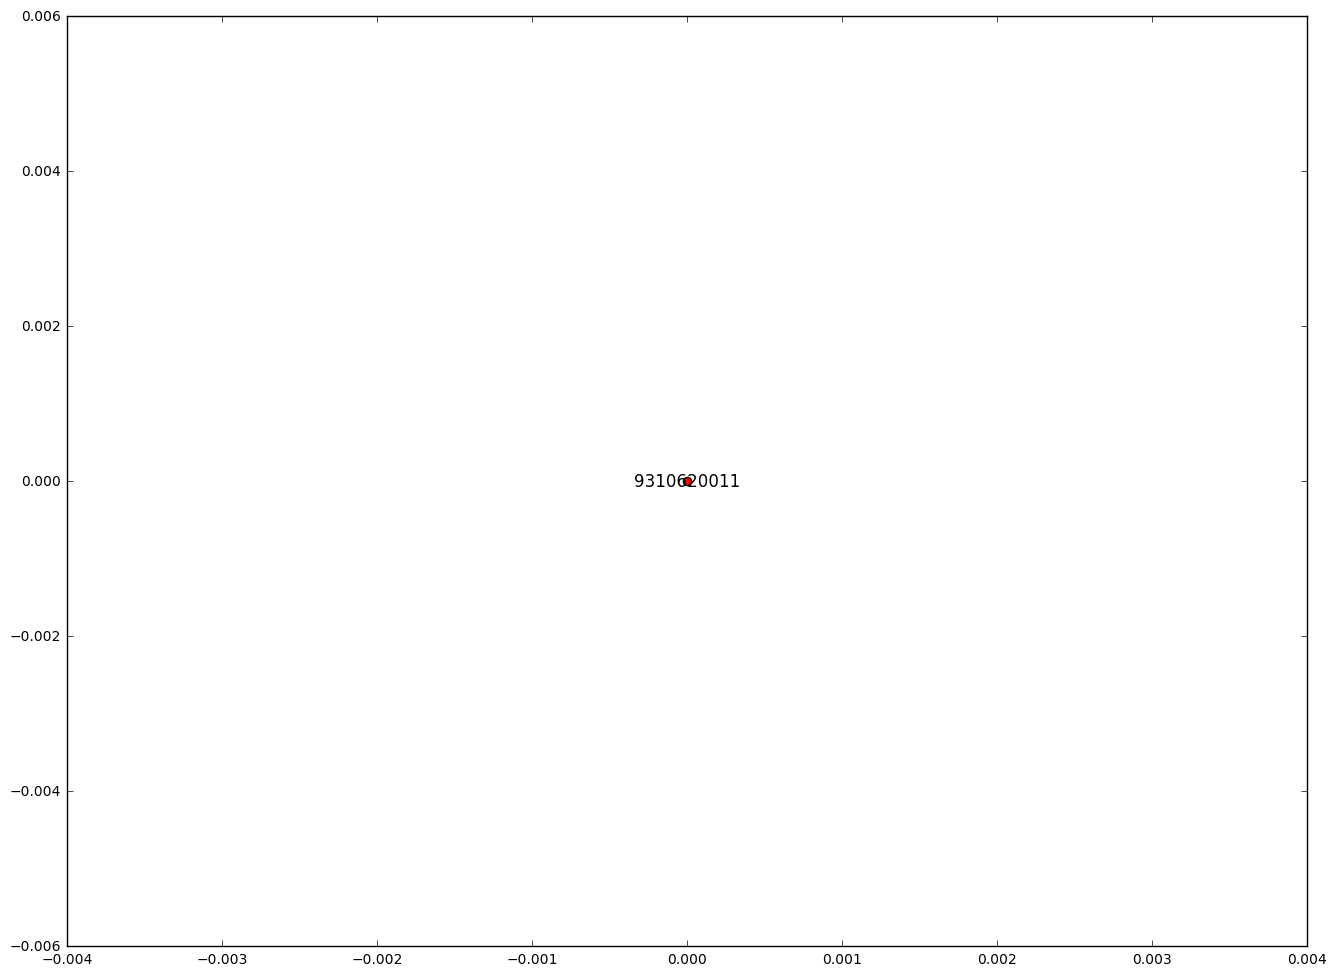

In [61]:
plt.axis("off")
plt.figure(figsize=(16,12))
sg = get_subgraph('9310620011')
spring_pos = nx.spring_layout(sg,k=0.3)
nx.draw_networkx(sg, pos=spring_pos, with_labels=True, node_size=35)